-5
5
200


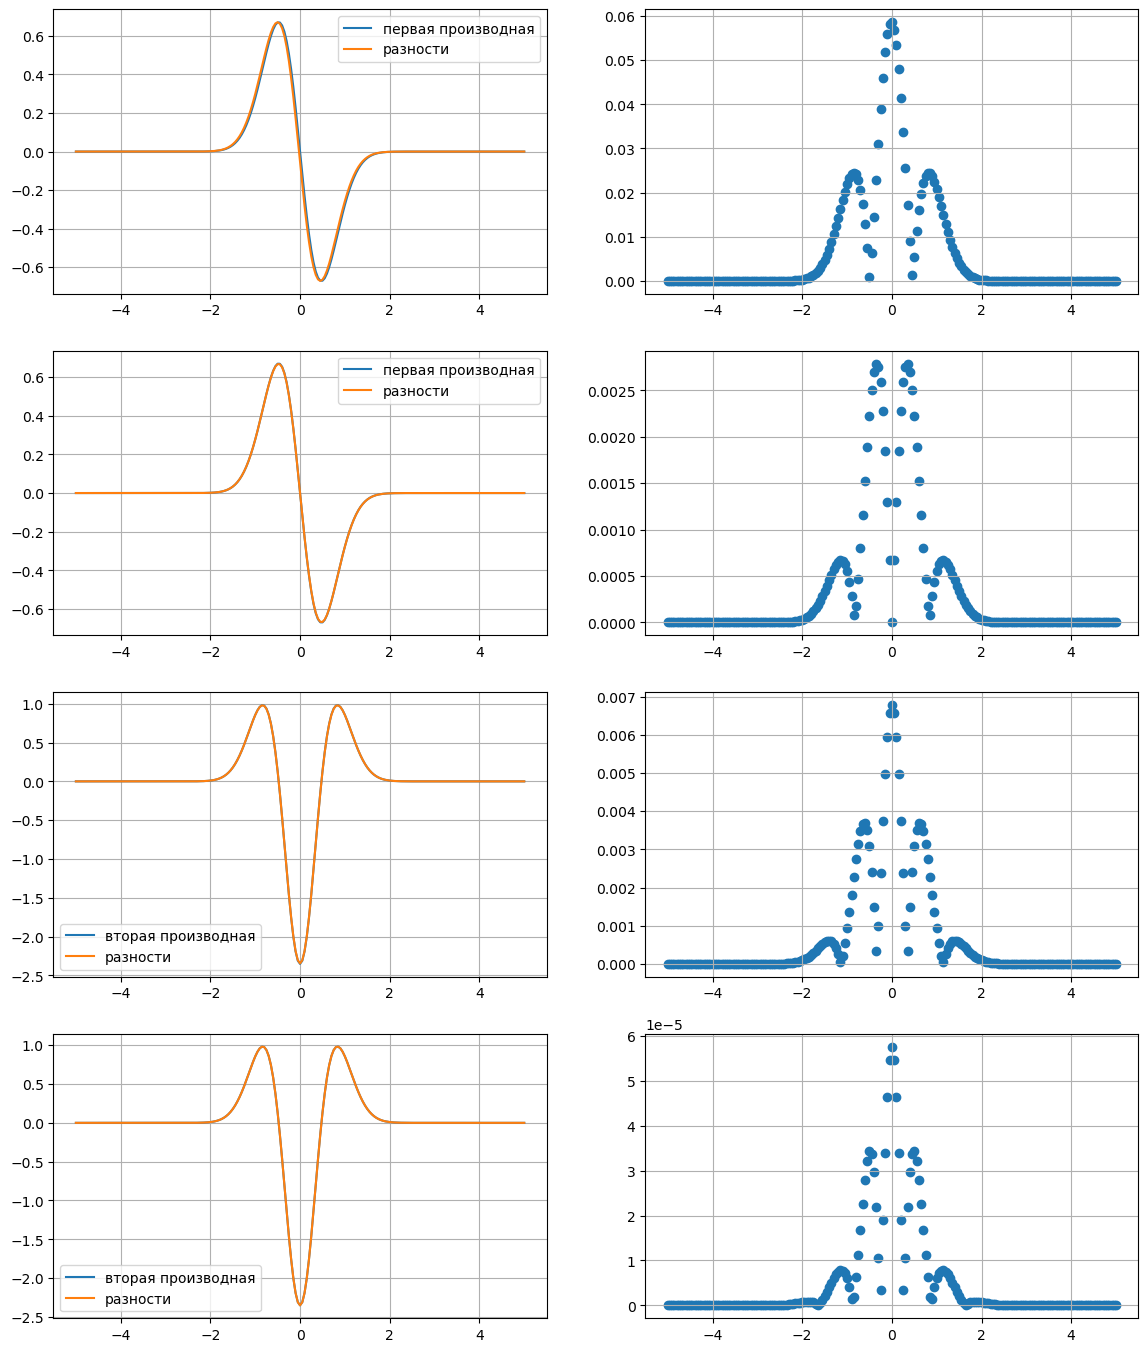

0.058590529922566185 max для правой разности второго порядка
0.0027888026513870345 max для центральной разности второго порядка
0.006781190385018565 max для второй производной второй порядок
5.763181762841185e-05 max для второй производной четвертый порядок


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import math 
a = float(input())
b = float(input())
n = int(input())
x = np.linspace(a,b,n+1)
f = lambda x: np.cosh(np.exp(-x**2))
g = f(x)
y = g.tolist()
m = np.linspace(a,b,n+1)
h_m = (m[1] - m[0])
c = np.arange(a-2*h_m, b+2*h_m + h_m/2, h_m)
y_c = f(c)
y_c1 = y_c.tolist()

h_n = (x[1] - x[0])

t = sp.Symbol('t')
z = int()
lst = list()
h = float()
def right_diff(z, lst, h):
     return ((lst[z+1] - lst[z])/h)

def center_diff(z, lst, h):
    return (lst[z+1] - lst[z-1])/(2*h)

def second_der_1(z, lst, h):
    return (lst[z-1] -2*lst[z] + lst[z+1])/(h**2)

def second_der_2(z, lst, h):
    return (-lst[z+2] + 16*lst[z+1] - 30*lst[z] + 16*lst[z-1] - lst[z-2])/(12*(h**2))

y_first_der = sp.diff(sp.cosh(sp.exp(-t**2)), t)
y_second_der = sp.diff(y_first_der)

first = np.array([float(y_first_der.subs(t, c[i])) for i in range(2,len(c)-2)])
second = [float(y_second_der.subs(t, c[i])) for i in range(2,len(c) - 2)]
    

right_difference = []
y_der_first_1 = []
for i in range(n):
    y_der_first_1.append(float(y_first_der.subs(t,x[i])))
    right_difference.append(right_diff(i, y, h_n))
r_right_first = abs(np.array(right_difference) - np.array(y_der_first_1))
    
    
center_difference = []
y_der_first_2 = []
for i in range(1,n):
    y_der_first_2.append(float(y_first_der.subs(t,x[i])))
    center_difference.append(center_diff(i, y, h_n))
r_center_first = abs(np.array(center_difference) - np.array(y_der_first_2))
    
second_dir_h2 = []
y_der_second_1 = []
for i in range(1,n):
    y_der_second_1.append(float(y_second_der.subs(t,x[i])))
    second_dir_h2.append(second_der_1(i, y, h_n))
r_second_1 = abs(np.array(second_dir_h2) - np.array(y_der_second_1))
    
second_dir_h4 = []
y_der_second_2 = []
for i in range(2,n-1):
    y_der_second_2.append(float(y_second_der.subs(t,x[i])))
    second_dir_h4.append(second_der_2(i, y, h_n))
r_second_2 = abs(np.array(second_dir_h4) - np.array(y_der_second_2))


c_diff = [c[i] for i in range(2,len(c)-2)]
diff_c1 = np.array([right_diff(k, y_c1, h_m) for k in range(2,len(c) - 2)])
diff_c2 = np.array([center_diff(k, y_c1, h_m) for k in range(2,len(c) - 2)])
diff_c3 = np.array([second_der_1(k, y_c1, h_m) for k in range(2,len(c) - 2)]) 
diff_c4 = np.array([second_der_2(k, y_c1, h_m) for k in range(2,len(c) - 2)])

fig, axs = plt.subplots(figsize = (14, 17), nrows= 4, ncols= 2)
fig.set_size_inches(14,17)
axs[0,0].plot(c_diff, first, label = 'первая производная')
axs[0,0].plot(c_diff, diff_c1, label = 'разности')
axs[0,0].grid(True)
axs[0,0].legend()
axs[0,1].scatter(c_diff, abs(first - diff_c1))
axs[0,1].grid(True)
axs[1,0].plot(c_diff, first, label = 'первая производная')
axs[1,0].grid(True)
axs[1,0].plot(c_diff, diff_c2, label = 'разности')
axs[1,0].legend()
axs[1,1].scatter(c_diff, abs(first - diff_c2))
axs[1,1].grid(True)
axs[2,0].plot(c_diff, second, label = 'вторая производная')
axs[2,0].grid(True)
axs[2,0].plot(c_diff, diff_c3, label = 'разности')
axs[2,0].legend()
axs[2,1].scatter(c_diff, abs(second - diff_c3))
axs[2,1].grid(True)
axs[3,0].plot(c_diff, second, label = 'вторая производная')
axs[3,0].grid(True)
axs[3,0].plot(c_diff, diff_c4, label = 'разности')
axs[3,0].legend()
axs[3,1].scatter(c_diff, abs(second - diff_c4))
axs[3,1].grid(True)
plt.show()
print(max(abs(first - diff_c1)), 'max для правой разности второго порядка')
print(max(abs(first - diff_c2)), 'max для центральной разности второго порядка')
print(max(abs(second - diff_c3)), 'max для второй производной второй порядок')
print(max(abs(second - diff_c4)), 'max для второй производной четвертый порядок')


4
#### правая разность: f'(x_i) = (f(x_i+1) - f(x_i))/h
центральрная разность: f'(x_i) = (f(x_i+1) - f(x_i-1))/2h
вторая производная с квадратичной погрешностью: f"(x_i) = ...
вьорая производная с четвертым порядком точности: f"(x_i) = ...

In [11]:
import numpy as np
print(np.exp(1))

2.718281828459045
